# Proyek Machine Learning - Dearmawan
# Diabetes Prediction Project

# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error # Added MSE
import zipfile
import os


# Data Loading


In [40]:
try:
    df = pd.read_csv('diabetes.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the dataset is in the correct directory.")

Dataset loaded successfully.


# Data Understanding

In [41]:
print("\n=== Data Understanding ===")

# Tampilkan 5 baris pertama
print("\nFirst 5 rows of the dataset:")
print(df.head())


=== Data Understanding ===

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


- Dari lima baris pertama dataset ini, terlihat bahwa terdapat berbagai variasi dalam faktor-faktor yang berkaitan dengan diabetes seperti kadar glukosa, tekanan darah, ketebalan kulit, insulin, dan indeks massa tubuh (BMI). Misalnya, nilai glukosa berkisar antara 85 hingga 183 dan BMI berkisar antara 23.3 hingga 43.1. Terlihat pula bahwa sebagian pasien memiliki hasil “Outcome” 1, yang menunjukkan mereka terdiagnosis diabetes, dan sebagian lainnya tidak. Hal ini menunjukkan adanya potensi hubungan antara nilai-nilai medis ini dengan kemungkinan seseorang mengidap diabetes.

In [42]:
# Informasi dasar dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Dataset ini terdiri dari 768 entri dan 9 kolom fitur tanpa nilai yang hilang (non-null), yang menunjukkan data bersih dan siap untuk analisis lebih lanjut. Mayoritas kolom bertipe numerik (int64 dan float64), mencakup faktor-faktor medis seperti glukosa, tekanan darah, insulin, hingga usia, yang dapat digunakan untuk memprediksi variabel target yaitu Outcome (indikasi diabetes). Struktur data yang lengkap ini sangat mendukung penerapan model pembelajaran mesin.

In [43]:
# Deskripsi statistik
print("\nStatistical Description:")
print(df.describe())


Statistical Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      

- Berdasarkan deskripsi statistik, terlihat bahwa beberapa fitur seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI memiliki nilai minimum 0, yang secara medis tidak realistis dan kemungkinan menunjukkan data hilang yang diisi dengan nol. Rata-rata usia pasien adalah sekitar 33 tahun, dengan nilai maksimum mencapai 81 tahun, dan rata-rata nilai glukosa adalah sekitar 121. Nilai Outcome memiliki mean 0.35, menunjukkan bahwa sekitar 35% dari pasien dalam dataset terdiagnosis diabetes. Temuan ini menunjukkan perlunya penanganan data nol sebelum analisis lanjutan atau pelatihan model.

In [44]:
# Cek missing values (secara eksplisit NaN)
print("\nMissing Values Check (Explicit NaN):")
print(df.isnull().sum())


Missing Values Check (Explicit NaN):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


- Dari hasil pengecekan secara eksplisit, tidak ditemukan nilai kosong (NaN) pada keseluruhan dataset. Ini menunjukkan bahwa dataset secara teknis bersih dan tidak mengandung nilai hilang yang dikenali langsung oleh pandas.

In [45]:
print("\nDuplicate Rows Check:")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    print("Dropping duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"Dataset shape after dropping duplicates: {df.shape}")
else:
    print("No duplicate rows found.")



Duplicate Rows Check:
Number of duplicate rows: 0
No duplicate rows found.


- Tidak adanya duplikat

In [46]:
# Analisis nilai 0 yang mungkin merupakan missing values terselubung
print("\nChecking for zero values in relevant columns:")
zero_value_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print((df[zero_value_cols] == 0).sum())
# Nilai 0 pada kolom ini tidak logis secara medis (kecuali mungkin Insulin pada kasus tertentu, tapi tetap mencurigakan)


Checking for zero values in relevant columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


- Meskipun tidak ada nilai NaN, ditemukan sejumlah nilai nol pada fitur penting seperti Glucose (5 data), BloodPressure (35), SkinThickness (227), Insulin (374), dan BMI (11). Nilai nol ini secara medis tidak realistis dan kemungkinan besar merupakan representasi terselubung dari data yang hilang, sehingga perlu penanganan lebih lanjut seperti imputasi agar tidak mengganggu proses pelatihan model.


Plotting feature distributions...


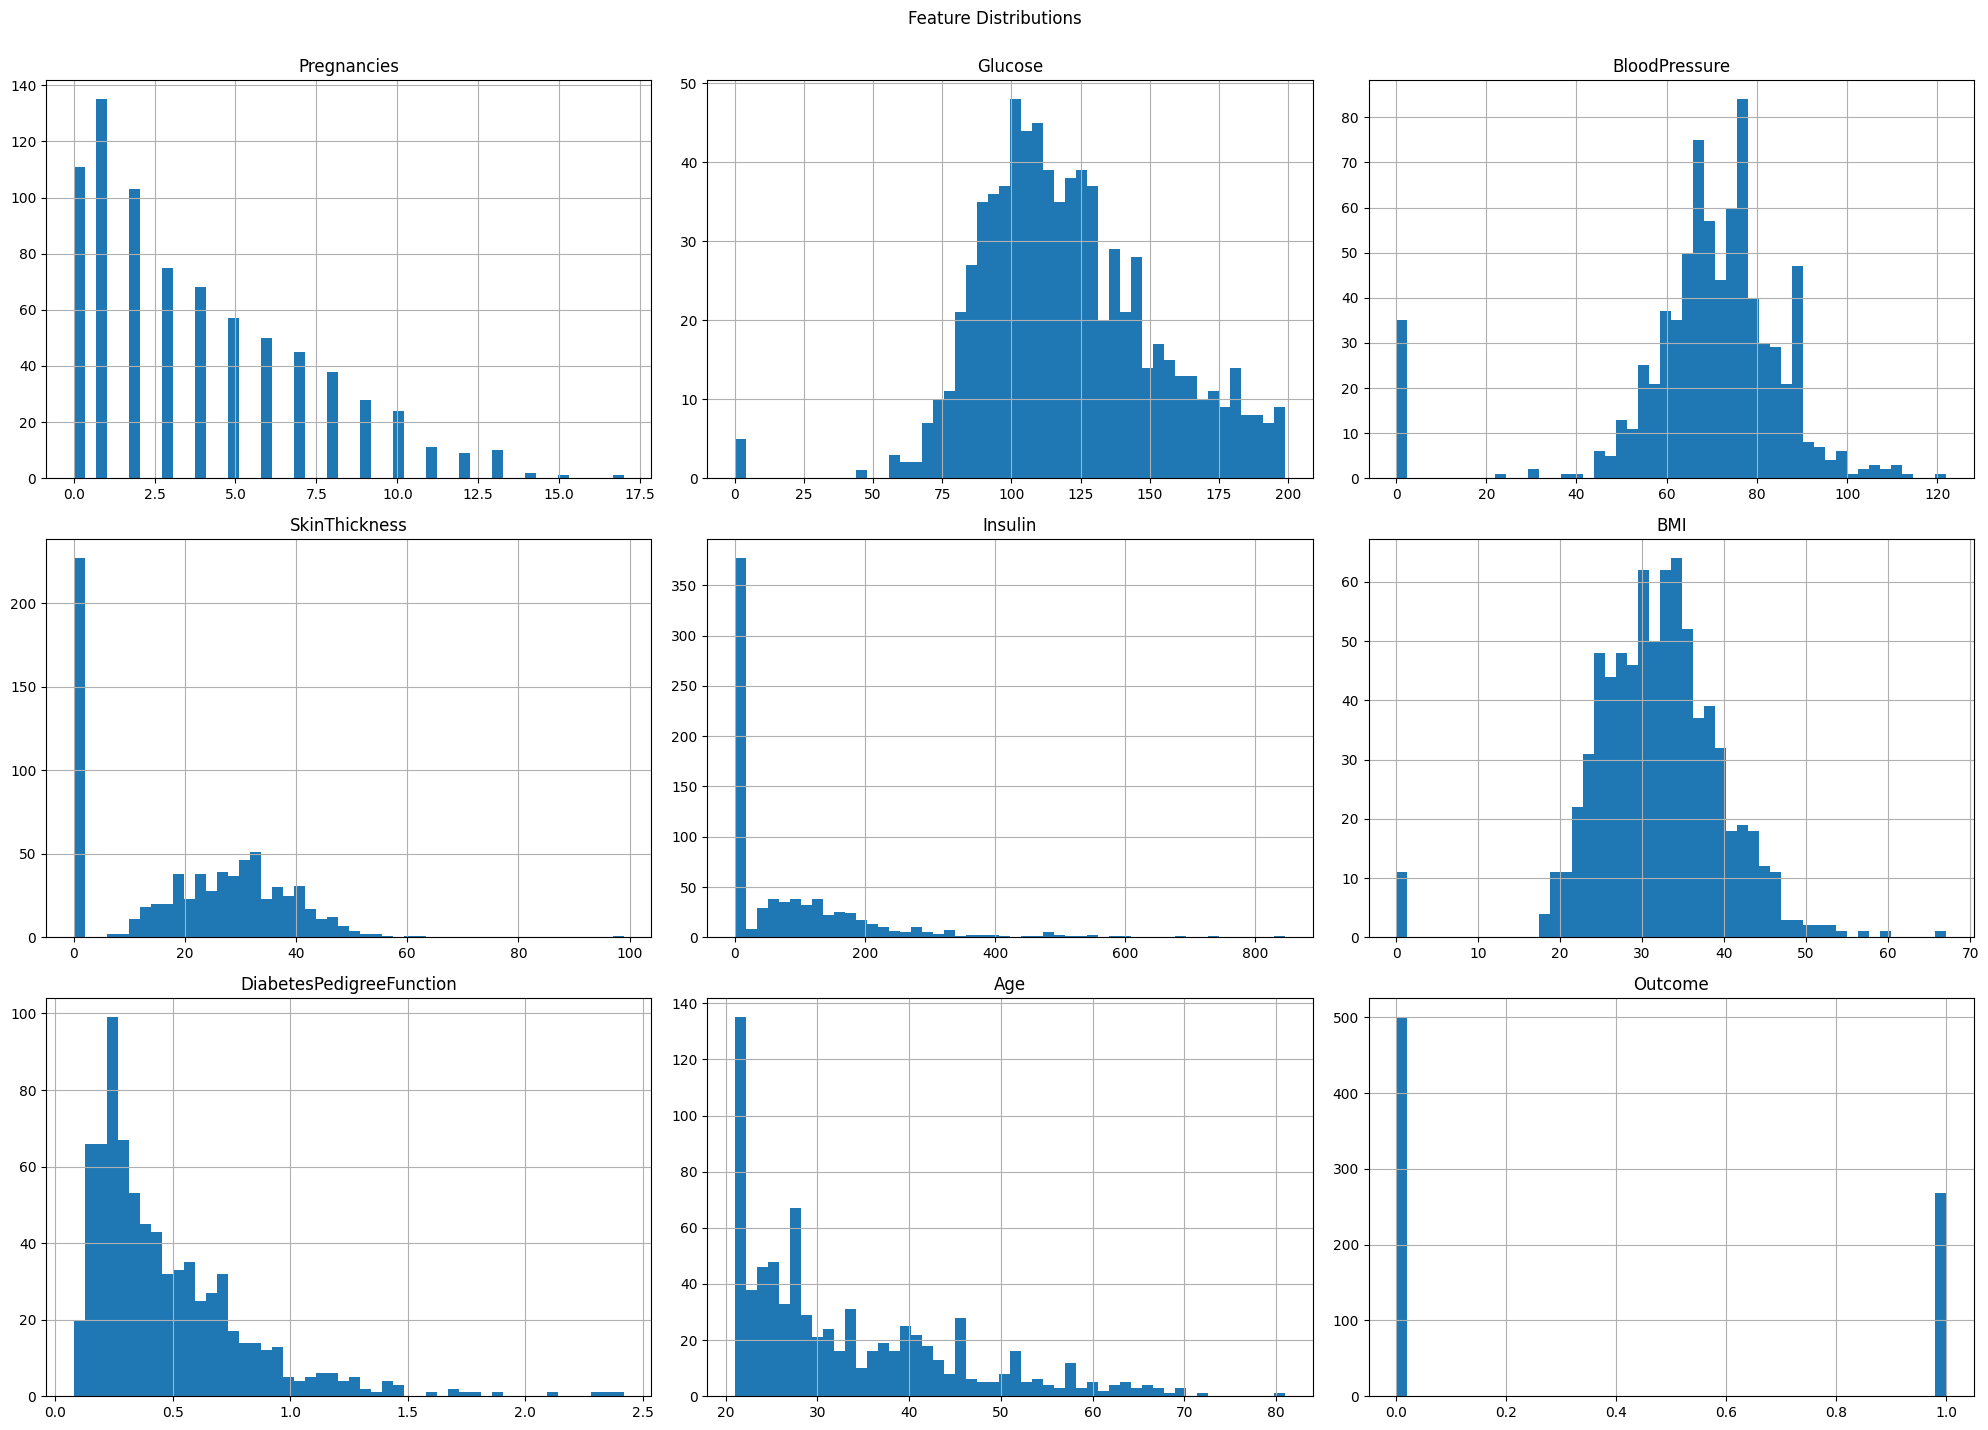

In [47]:
# Visualisasi Distribusi Fitur
print("\nPlotting feature distributions...")
df.hist(bins=50, figsize=(20,15))
plt.suptitle("Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 
plt.show() 

- Visualisasi distribusi fitur menunjukkan bahwa beberapa variabel seperti Insulin dan SkinThickness memiliki banyak nilai nol dan distribusi yang sangat miring, mengindikasikan kemungkinan adanya missing value terselubung. Selain itu, fitur Outcome terlihat tidak seimbang, dengan lebih banyak pasien non-diabetes dibandingkan yang terdiagnosis diabetes. 


Plotting boxplots for outlier detection...


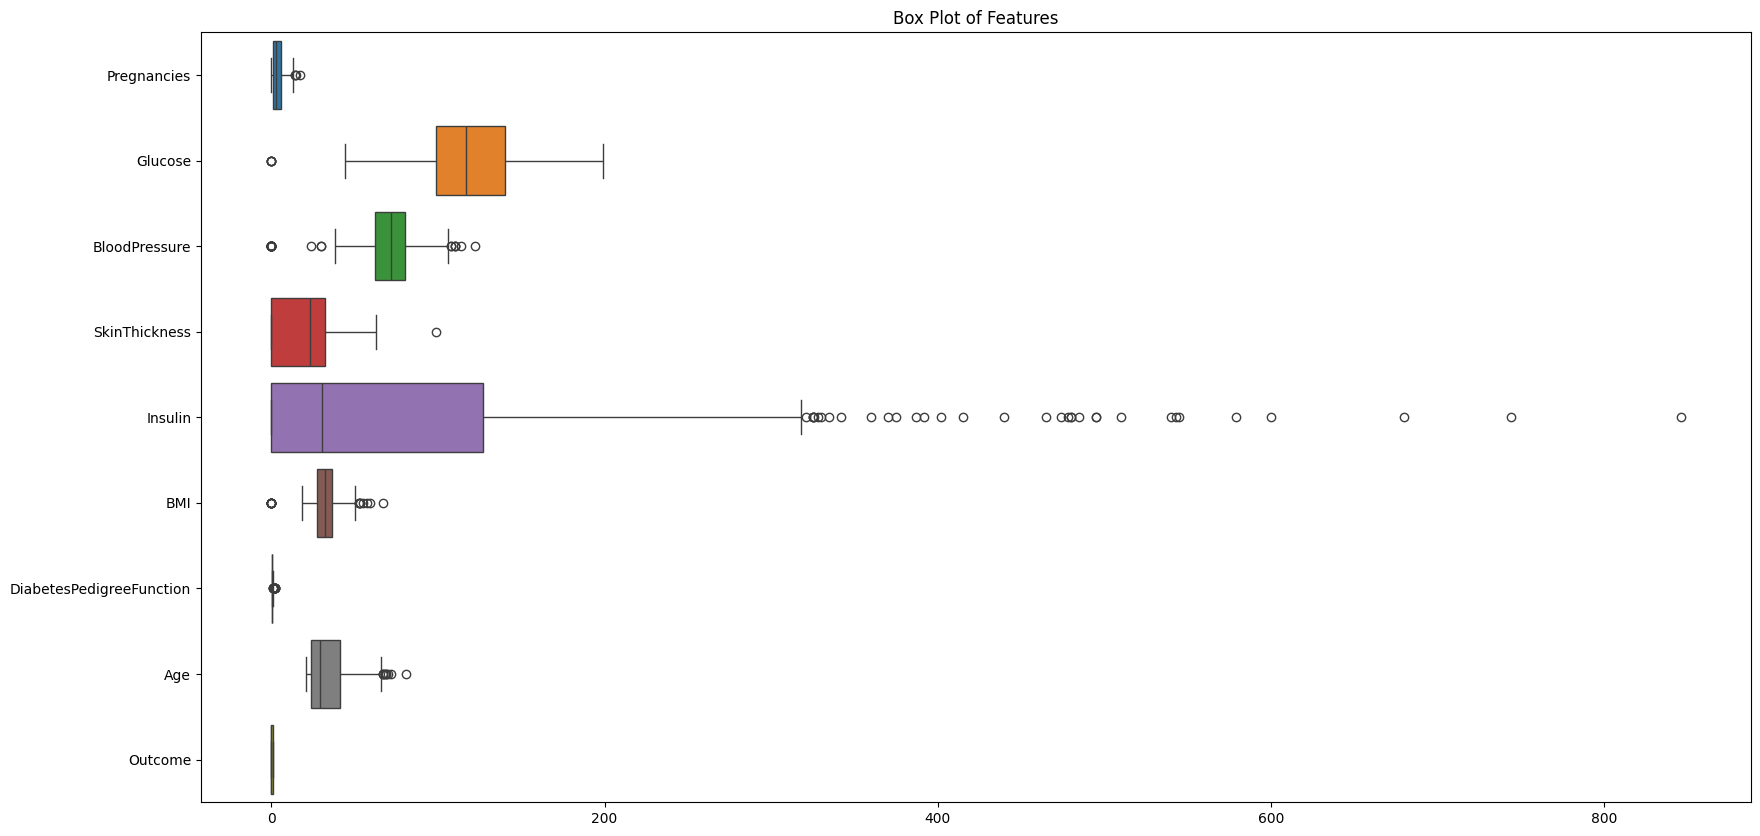

In [48]:
# Visualisasi Box Plot untuk melihat outliers
print("\nPlotting boxplots for outlier detection...")
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of Features")
plt.show() 

- Box plot menunjukkan bahwa sebagian besar fitur dalam dataset memiliki outlier, terutama pada variabel Insulin, Glucose, dan DiabetesPedigreeFunction, yang memiliki nilai ekstrem jauh di atas rentang normalnya. 


Outcome Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


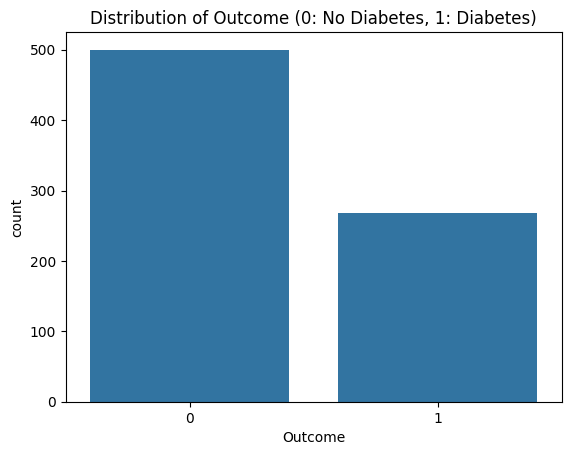

In [49]:
# Visualisasi Distribusi Target ('Outcome')
print("\nOutcome Distribution:")
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (0: No Diabetes, 1: Diabetes)')
plt.show() # Tampilkan plot di .ipynb

- Distribusi Outcome menunjukkan ketidakseimbangan kelas, di mana jumlah pasien tanpa diabetes (kelas 0) lebih banyak (500 orang) dibandingkan dengan pasien yang terdiagnosis diabetes (kelas 1) sebanyak 268 orang. Ketidakseimbangan ini penting untuk diperhatikan dalam proses pemodelan karena model prediktif dapat cenderung mengutamakan kelas mayoritas, sehingga berisiko mengabaikan deteksi kasus diabetes yang sebenarnya lebih penting secara medis. 


Plotting correlation heatmap...


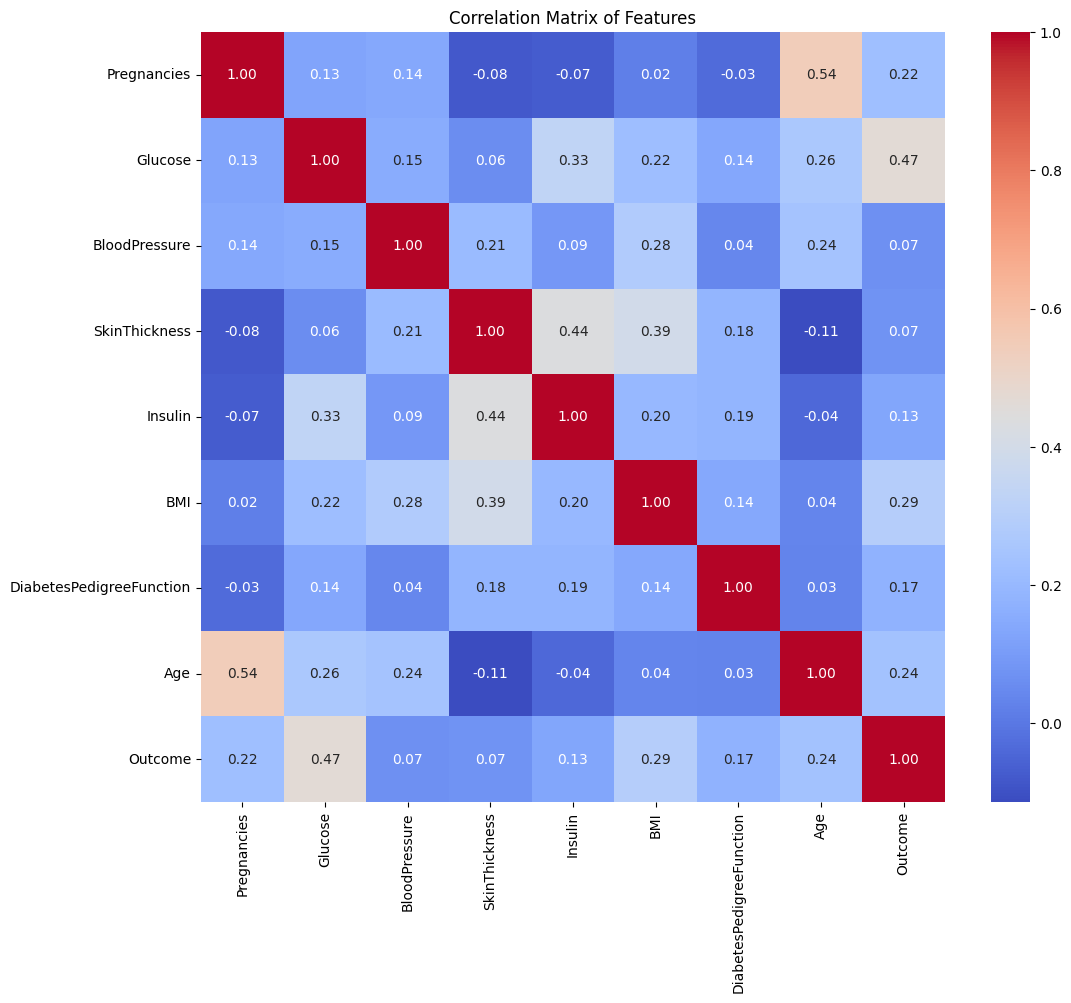

In [ ]:
# Visualisasi Korelasi antar Fitur
print("\nPlotting correlation heatmap...")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show() 

- Berdasarkan matriks korelasi, fitur yang paling berkorelasi positif terhadap kemungkinan seseorang menderita diabetes (Outcome) adalah Glucose (0.47), diikuti oleh BMI (0.29), Age (0.24), dan Pregnancies (0.22). Hal ini menunjukkan bahwa kadar glukosa darah yang tinggi, indeks massa tubuh yang lebih besar, usia yang lebih tua, serta jumlah kehamilan yang lebih banyak cenderung berkaitan dengan risiko diabetes yang lebih tinggi. Sementara itu, fitur-fitur seperti BloodPressure, SkinThickness, dan Insulin memiliki korelasi yang lebih lemah terhadap Outcome, menunjukkan pengaruh yang relatif lebih kecil dalam konteks ini. 

# Data Preparation

In [51]:
# Mengganti nilai 0 yang tidak logis dengan NaN
print("\nReplacing illogical zero values with NaN...")
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Cek kembali missing values setelah penggantian
print("\nMissing Values Check after replacing zeros:")
print(df.isnull().sum())


Replacing illogical zero values with NaN...

Missing Values Check after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


- Adanya nilai nol yang tidak logis pada beberapa fitur seperti Glucose (5 missing), BloodPressure (35 missing), SkinThickness (227 missing), Insulin (374 missing), dan BMI (11 missing) setelah menggantikan nilai nol dengan NaN.

In [52]:
# Imputasi missing values dengan median
# Median lebih robust terhadap outlier dibandingkan mean
print("\nImputing NaN values with the median...")
for col in cols_to_replace:
    if df[col].isnull().any():
       df[col].fillna(df[col].median(),inplace=True)

# Cek kembali missing values setelah imputasi
print("\nMissing Values Check after imputation:")
print(df.isnull().sum()) # Seharusnya sudah 0 semua


Imputing NaN values with the median...

Missing Values Check after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_12276\238587595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12276\238587595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

- Missing Value sudah teratasi setalah melakukan imputasi


Handling Outliers using IQR capping...
Outliers capped in 'Pregnancies': 0 lower, 4 upper.
No outliers (or already within 1.5*IQR) found in 'Glucose'.
Outliers capped in 'BloodPressure': 4 lower, 10 upper.
Outliers capped in 'SkinThickness': 39 lower, 48 upper.
Outliers capped in 'Insulin': 173 lower, 173 upper.
Outliers capped in 'BMI': 0 lower, 8 upper.
Outliers capped in 'DiabetesPedigreeFunction': 0 lower, 29 upper.
Outliers capped in 'Age': 0 lower, 9 upper.

Plotting boxplots after outlier capping...


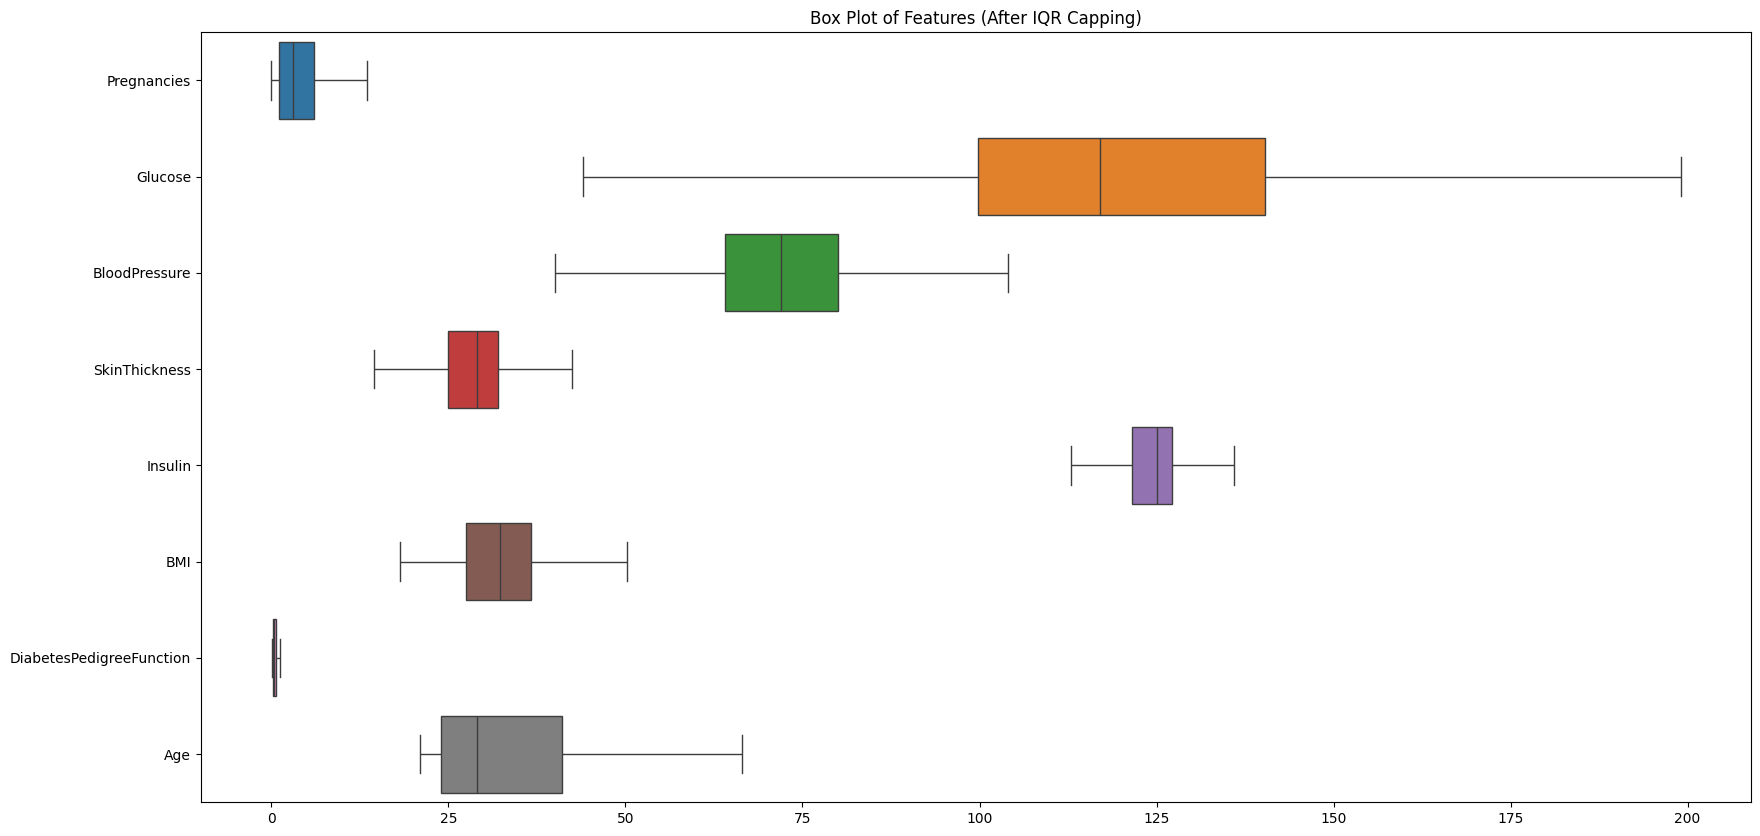

In [53]:
print("\nHandling Outliers using IQR capping...")

features_to_cap = df.drop('Outcome', axis=1).columns 

for column in features_to_cap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    initial_outliers_lower = df[df[column] < lower_bound].shape[0]
    initial_outliers_upper = df[df[column] > upper_bound].shape[0]

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    capped_outliers_lower = df[df[column] < lower_bound].shape[0] # Should be 0
    capped_outliers_upper = df[df[column] > upper_bound].shape[0] # Should be 0

    if initial_outliers_lower > 0 or initial_outliers_upper > 0:
        print(f"Outliers capped in '{column}': {initial_outliers_lower} lower, {initial_outliers_upper} upper.")
    else:
        print(f"No outliers (or already within 1.5*IQR) found in '{column}'.")


print("\nPlotting boxplots after outlier capping...")
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop('Outcome', axis=1), orient='h') # Exclude 'Outcome' for boxplot of features
plt.title("Box Plot of Features (After IQR Capping)")
plt.show()

- Outliers udh teratasi

# Split Data

In [54]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Features (X) and Target (y) separated.
Shape of X: (768, 8)
Shape of y: (768,)


- Proses pemisahan fitur (X) dan target (y) menunjukkan bahwa dataset awal berisi 768 sampel dengan 8 fitur (X memiliki bentuk (768, 8)) dan 1 variabel target (y memiliki bentuk (768,)). Ini konsisten dengan struktur dataset diabetes yang digunakan, di mana 8 fitur seperti Pregnancies, Glucose, dan BMI digunakan untuk memprediksi variabel biner Outcome.

In [55]:
# Membagi data menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Train set Outcome distribution:\n", y_train.value_counts(normalize=True))
print("Test set Outcome distribution:\n", y_test.value_counts(normalize=True))


Data split into training and testing sets.
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)
Train set Outcome distribution:
 Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Test set Outcome distribution:
 Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


- Proses pemisahan data ke dalam set pelatihan dan pengujian menunjukkan pembagian yang optimal dengan 614 sampel untuk pelatihan (X_train: (614, 8), y_train: (614,)) dan 154 sampel untuk pengujian (X_test: (154, 8), y_test: (154,)), sesuai dengan rasio 80:20. Distribusi kelas 'Outcome' (0 untuk non-diabetes, 1 untuk diabetes) tetap seimbang melalui stratifikasi, dengan proporsi pada set pelatihan (0: 0.651466, 1: 0.348534) dan set pengujian (0: 0.649351, 1: 0.350649) yang hampir identik dengan distribusi asli data. Konsistensi ini memastikan bahwa model akan dilatih dan dievaluasi pada representasi yang adil dari data, mengurangi risiko bias dan meningkatkan keandalan hasil prediksi, terutama untuk dataset dengan kelas yang tidak seimbang seperti ini.

In [56]:
# Feature Scaling menggunakan StandardScaler
# Scaling penting untuk algoritma seperti KNN
print("\nApplying StandardScaler to features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ubah kembali ke DataFrame untuk kemudahan inspeksi 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nScaled training data (first 5 rows):")
print(X_train_scaled.head())


Applying StandardScaler to features...

Scaled training data (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.855120 -1.056427      -0.858066      -1.910489 -1.475845 -0.784098   
1     0.360963  0.144399       0.500239      -0.243007 -1.475845 -0.421343   
2    -0.551100 -0.556083      -1.197642       1.491175 -1.475845  0.379741   
3    -0.855120  0.811525      -1.367431       0.023790  0.039775 -0.406228   
4    -1.159141 -0.889646      -0.688278       1.357776 -1.475845  1.845875   

   DiabetesPedigreeFunction       Age  
0                  0.400579 -0.798419  
1                 -0.090600  0.572372  
2                 -0.836078 -0.712745  
3                  0.344842 -0.370047  
4                 -0.344899 -0.969768  


- Penerapan StandardScaler pada fitur menunjukkan bahwa data telah berhasil dinormalisasi, seperti terlihat pada lima baris pertama data pelatihan yang memiliki nilai rata-rata mendekati 0 dan deviasi standar mendekati 1 untuk setiap fitur, seperti Pregnancies (-0.835135 hingga -1.153338), Glucose (-1.056427 hingga 0.811525), dan BMI (-0.769447 hingga 1.782373).

# Modeling

In [58]:
print("\n=== Modeling ===")

# Model 1: K-Nearest Neighbors (KNN)
print("\nTraining K-Nearest Neighbors (KNN)...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Model 2: Random Forest
print("\nTraining Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train_scaled, y_train)

# Model 3: Logistic Regression 
print("\nTraining Logistic Regression Classifier...")
lr = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets
lr.fit(X_train_scaled, y_train)


=== Modeling ===

Training K-Nearest Neighbors (KNN)...

Training Random Forest Classifier...

Training Logistic Regression Classifier...


LogisticRegression(random_state=42, solver='liblinear')

In [59]:
# Hyperparameter Tuning untuk model terpilih ( Random Forest)
print("\nPerforming Hyperparameter Tuning for Random Forest using GridSearchCV...")

# Tentukan parameter grid yang lebih kecil untuk contoh cepat
param_grid_rf = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20],   
    'min_samples_split': [2, 5],   
    'min_samples_leaf': [1, 3]    
}

# Gunakan cross-validation 3-fold saja untuk contoh
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=3,          
                       n_jobs=-1,     
                       verbose=1,    
                       scoring='accuracy') 

rf_grid.fit(X_train_scaled, y_train)

print("\nBest parameters found for Random Forest:")
print(rf_grid.best_params_)

# Model terbaik dari GridSearchCV
best_rf = rf_grid.best_estimator_
print("\nBest Random Forest model trained with optimal parameters.")





Performing Hyperparameter Tuning for Random Forest using GridSearchCV...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters found for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}

Best Random Forest model trained with optimal parameters.


- Hasil tuning hyperparameter pada model Random Forest menggunakan GridSearchCV, di mana dilakukan pencarian terhadap 36 kombinasi parameter dengan 3-fold cross-validation, menghasilkan total 108 pelatihan model. Hasil terbaik diperoleh dengan parameter n_estimators=150, min_samples_leaf=3, min_samples_split=2, dan tanpa batasan kedalaman pohon (max_depth=None). 

# Evaluation

In [ ]:
# Helper function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0) # Handles cases with no predicted positives
    recall = recall_score(y_true, y_pred, zero_division=0)       # Handles cases with no actual positives
    f1 = f1_score(y_true, y_pred, zero_division=0)               # Handles cases with no positives
    mse = mean_squared_error(y_true, y_pred) # MSE for classification (0/1 labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}") # Added MSE

    print(f"\nConfusion Matrix ({model_name}):")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if 'KNN' in model_name else ('Greens' if 'Base RF' in model_name else ('Oranges' if 'Tuned RF' in model_name else 'Purples')))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show() 
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_true, y_pred, zero_division=0))
    return accuracy, precision, recall, f1, mse



--- KNN (Baseline K=5) Evaluation ---
Accuracy: 0.7532
Precision: 0.6600
Recall: 0.6111
F1 Score: 0.6346
Mean Squared Error (MSE): 0.2468

Confusion Matrix (KNN (Baseline K=5)):


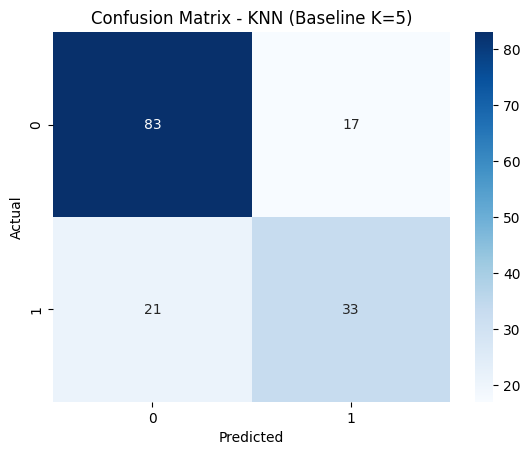


Classification Report (KNN (Baseline K=5)):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Evaluasi Model KNN (Baseline)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn, pre_knn, rec_knn, f1_knn, mse_knn = evaluate_model(y_test, y_pred_knn, "KNN (Baseline K=5)")


- Model K-Nearest Neighbors (KNN) dengan K=5 menunjukkan kinerja yang cukup baik dengan akurasi 75,32%. Namun, terdapat ketidakseimbangan performa antara kelas 0 dan kelas 1. Kelas 0 memiliki precision, recall, dan F1-score yang lebih tinggi (masing-masing 0,80, 0,83, dan 0,81) dibandingkan kelas 1 (0,66, 0,61, dan 0,63), yang mengindikasikan bahwa model lebih akurat dalam mengklasifikasikan kelas mayoritas. Hal ini juga tercermin pada confusion matrix, di mana terdapat 21 false negative untuk kelas 1 dan 17 false positive untuk kelas 0. Meskipun MSE tergolong rendah (0,2468), model ini bisa ditingkatkan lebih lanjut, terutama untuk meningkatkan sensitivitas terhadap kelas minoritas


--- Random Forest (Baseline) Evaluation ---
Accuracy: 0.7662
Precision: 0.6957
Recall: 0.5926
F1 Score: 0.6400
Mean Squared Error (MSE): 0.2338

Confusion Matrix (Random Forest (Baseline)):


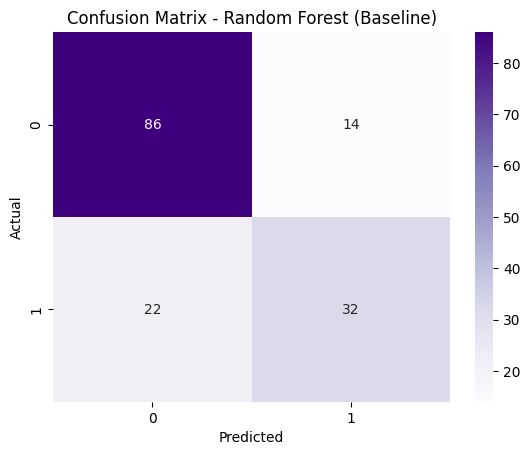


Classification Report (Random Forest (Baseline)):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [63]:
# Evaluasi Model Random Forest (Baseline)
y_pred_rf_base = rf.predict(X_test_scaled)
acc_rf_base, pre_rf_base, rec_rf_base, f1_rf_base, mse_rf_base = evaluate_model(y_test, y_pred_rf_base, "Random Forest (Baseline)")


- Model ini memberikan performa terbaik secara keseluruhan dengan akurasi 76.62%, precision 0.6957, dan F1-score 0.64. Meskipun recall untuk kelas 1 masih rendah (0.59), model ini memiliki keseimbangan yang cukup baik antara precision dan recall. Confusion matrix menunjukkan 32 prediksi benar untuk kelas 1 dan 22 false negative, yang menunjukkan model masih kesulitan mengenali sebagian data positif, namun secara umum ini adalah baseline yang solid.


--- Random Forest (Tuned) Evaluation ---
Accuracy: 0.7597
Precision: 0.6889
Recall: 0.5741
F1 Score: 0.6263
Mean Squared Error (MSE): 0.2403

Confusion Matrix (Random Forest (Tuned)):


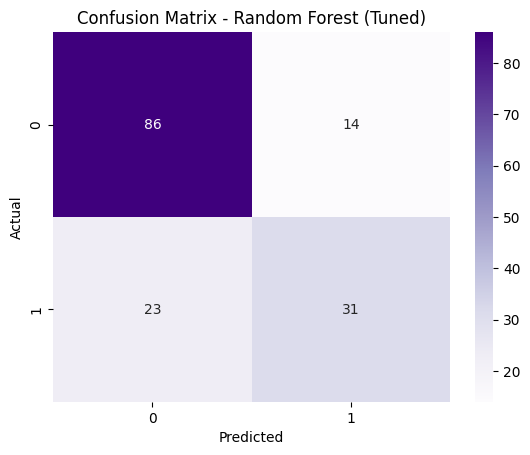


Classification Report (Random Forest (Tuned)):
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



In [64]:
# Evaluasi Model Random Forest (Tuned)
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
acc_rf_tuned, pre_rf_tuned, rec_rf_tuned, f1_rf_tuned, mse_rf_tuned = evaluate_model(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")


- Setelah tuning, performa model sedikit menurun dengan akurasi 75.97%, F1-score 0.6263, dan recall kelas 1 menurun menjadi 0.5741. Perubahan ini menunjukkan bahwa tuning belum berhasil meningkatkan generalisasi model dan justru sedikit memperburuk kemampuan model dalam mengenali kelas 1. False negative juga meningkat menjadi 23, sehingga sensitivitas model terhadap kelas minoritas perlu ditingkatkan.


--- Logistic Regression Evaluation ---
Accuracy: 0.7143
Precision: 0.6087
Recall: 0.5185
F1 Score: 0.5600
Mean Squared Error (MSE): 0.2857

Confusion Matrix (Logistic Regression):


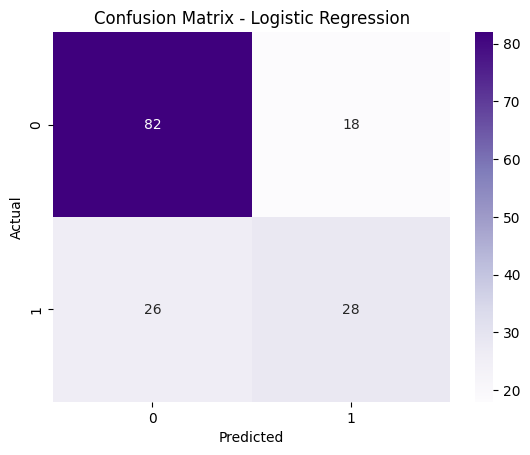


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [65]:
# Evaluasi Model Logistic Regression 
y_pred_lr = lr.predict(X_test_scaled)
acc_lr, pre_lr, rec_lr, f1_lr, mse_lr = evaluate_model(y_test, y_pred_lr, "Logistic Regression")


- Model ini mencapai akurasi keseluruhan sebesar 71,43% pada data uji. Dari confusion matrix, terlihat bahwa dari 100 kasus aktual non-diabetes (label 0), 82 diprediksi dengan benar, sementara 18 salah diklasifikasikan sebagai diabetes. Untuk 54 kasus aktual diabetes (label 1), 28 berhasil diidentifikasi dengan benar, namun 26 kasus terlewatkan (menjadi false negative). Hal ini menghasilkan recall sebesar 0,5185 untuk kelas diabetes (1), yang mengindikasikan model ini berhasil mengidentifikasi sekitar 52% individu yang sebenarnya menderita diabetes, sedangkan presisi untuk kelas diabetes adalah 0,6087, artinya ketika model memprediksi diabetes, sekitar 61% prediksinya benar. F1-score sebesar 0,56 untuk kelas diabetes menunjukkan keseimbangan yang moderat antara presisi dan recall dalam memprediksi diabetes, dan Mean Squared Error (MSE) sebesar 0,2857 mencerminkan rata-rata kuadrat perbedaan antara hasil aktual dan prediksi biner.

# Kesimpulan Evaluasi

In [66]:
print("\n=== Evaluation Summary ===")

results_summary = pd.DataFrame({
    'Model': ['KNN (Baseline)', 'Random Forest (Baseline)', 'Random Forest (Tuned)', 'Logistic Regression'],
    'Accuracy': [acc_knn, acc_rf_base, acc_rf_tuned, acc_lr],
    'Precision': [pre_knn, pre_rf_base, pre_rf_tuned, pre_lr],
    'Recall': [rec_knn, rec_rf_base, rec_rf_tuned, rec_lr],
    'F1 Score': [f1_knn, f1_rf_base, f1_rf_tuned, f1_lr],
    'MSE': [mse_knn, mse_rf_base, mse_rf_tuned, mse_lr]
})

print("\nModel Performance Metrics:")
print(results_summary.round(4)) # Round to 4 decimal places for display

print("\nComparing models based on F1-Score (often a good balance for classification):")
best_f1_model = results_summary.loc[results_summary['F1 Score'].idxmax()]
print(f"Best performing model based on F1-Score:\n{best_f1_model['Model']} with F1-Score: {best_f1_model['F1 Score']:.4f}")

print("\nComparing models based on Recall (if False Negative is more crucial):")
best_recall_model = results_summary.loc[results_summary['Recall'].idxmax()]
print(f"Best performing model based on Recall:\n{best_recall_model['Model']} with Recall: {best_recall_model['Recall']:.4f}")

print("\nComparing models based on MSE (lower is better):")
best_mse_model = results_summary.loc[results_summary['MSE'].idxmin()] # Lower MSE is better
print(f"Model with the lowest MSE:\n{best_mse_model['Model']} with MSE: {best_mse_model['MSE']:.4f}")


print("\nProject Finished.")


=== Evaluation Summary ===

Model Performance Metrics:
                      Model  Accuracy  Precision  Recall  F1 Score     MSE
0            KNN (Baseline)    0.7532     0.6600  0.6111    0.6346  0.2468
1  Random Forest (Baseline)    0.7662     0.6957  0.5926    0.6400  0.2338
2     Random Forest (Tuned)    0.7597     0.6889  0.5741    0.6263  0.2403
3       Logistic Regression    0.7143     0.6087  0.5185    0.5600  0.2857

Comparing models based on F1-Score (often a good balance for classification):
Best performing model based on F1-Score:
Random Forest (Baseline) with F1-Score: 0.6400

Comparing models based on Recall (if False Negative is more crucial):
Best performing model based on Recall:
KNN (Baseline) with Recall: 0.6111

Comparing models based on MSE (lower is better):
Model with the lowest MSE:
Random Forest (Baseline) with MSE: 0.2338

Project Finished.


- Ringkasan evaluasi menunjukkan bahwa model Random Forest (Baseline) secara umum memberikan performa terbaik dengan F1-Score tertinggi (0.6400) dan MSE terendah (0.2338), menandakan keseimbangan yang baik antara presisi dan recall serta kesalahan prediksi yang paling kecil. Meskipun demikian, jika prioritas utama adalah meminimalkan false negative (kasus diabetes yang tidak terdeteksi), maka model KNN (Baseline) unggul dengan Recall tertinggi (0.6111). Model Logistic Regression menunjukkan performa paling rendah di antara semua model yang diuji pada sebagian besar metrik.